# ФИО студента: Шатов Дмитрий Вадимович

# Номер группы: 18-ИВТ-2

# Вариант: 21

# Задание: Occupancy

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


# 1 пункт
<b>Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных</b>

1. date time - <b>Дата-время</b> 
2. Temperature - <b>Температура</b>
3. Relative Humidity - <b>Относительная влажность</b>
4. Light - <b>Свет</b>
5. CO2 - <b>Углекислый газ</b>
6. Humidity Ratio - <b>Удельная влажность</b>
7. Occupancy - <b>Занятость</b>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
%matplotlib inline

DATA_TIME = 'date'
TEMPERATURE = 'Temperature'
RELATIVE_HUMIDITY = 'Humidity'
LIGHT = 'Light'
CO2 = 'CO2'
HUMIDITY_RATIO = 'HumidityRatio'
OCCUPANCY = 'Occupancy'
df = pd.read_csv('datatest.txt')
df_pandas = pd.DataFrame(df)
df_pandas.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [23]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [24]:
df_pandas.shape


(2665, 7)

# 2 пункт
<b>Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции</b>

In [25]:
print("До удаления дубликатов:", df_pandas.shape)
df_pandas = df_pandas.drop_duplicates()
print("После удаления дубликатов:", df_pandas.shape)

До удаления дубликатов: (2665, 7)
После удаления дубликатов: (2665, 7)


Дубликаты не найдены 

# 3 пункт
<b>Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)</b>

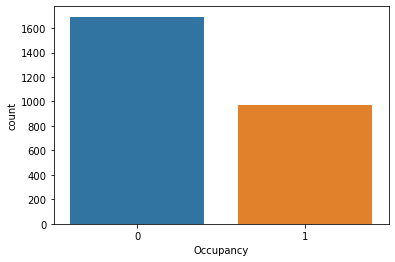

In [26]:
sns.countplot(data=df_pandas, x=OCCUPANCY)

Объем данных по каждому классу отличается. Будем считать классы несбалансированными. 

# 4 пункт

<b>Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования</b> 

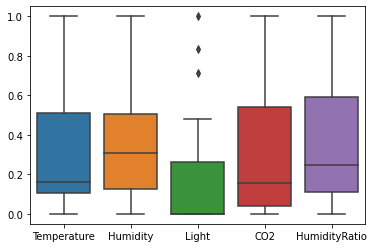

In [27]:
quan_atrib = [TEMPERATURE, RELATIVE_HUMIDITY, LIGHT, CO2, HUMIDITY_RATIO]
sns.boxplot(data = df_pandas[quan_atrib])

<b>Способ масшатбирования - нормализация</b>

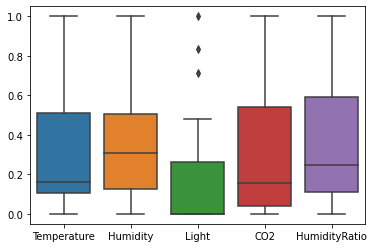

In [28]:
df_pandas[quan_atrib] = preprocessing.MinMaxScaler().fit_transform(df_pandas[quan_atrib].values.astype(float))
sns.boxplot(data = df_pandas[quan_atrib])

# 5 пункт
<b>Выполните замену категориальных признаков; выберите и обоснуйте способ замены</b>

In [29]:
categorical_columns = [c for c in df_pandas.columns if df_pandas[c].dtype.name == 'object']
numerical_columns   = [c for c in df_pandas.columns if df_pandas[c].dtype.name != 'object']
print (f"Категоиальные признаки: {categorical_columns}")
print (f"Числовые признаки: {numerical_columns}")

Категоиальные признаки: ['date']
Числовые признаки: ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


In [30]:
df_pandas[categorical_columns].describe()

,date
count,2665
unique,2665
top,2015-02-03 08:17:00
freq,1


In [31]:
df_pandas['date'].unique()

array(['2015-02-02 14:19:00', '2015-02-02 14:19:59',
       '2015-02-02 14:21:00', ..., '2015-02-04 10:40:59',
       '2015-02-04 10:41:59', '2015-02-04 10:43:00'], dtype=object)

In [ ]:
Замена не требуется, так как большинство значений является уникальным, и мы получим просто числа по порядку

# 6 пункт 
<b>Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)</b>

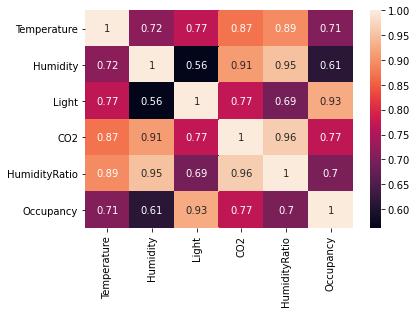

In [32]:
df_corr = df_pandas.corr()
sns.heatmap(df_corr, annot = True)

# 7 пункт
<b> Заполните пропущенные значения в данных </b>

In [33]:
df_pandas.count()

date             2665
Temperature      2665
Humidity         2665
Light            2665
CO2              2665
HumidityRatio    2665
Occupancy        2665
dtype: int64

Пропусков нет

# 8 пункт
<b>Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.</b>

In [34]:
X = df_pandas.drop(('date'), axis=1)
Y = df_pandas.Occupancy
feature_names = X.columns
print (feature_names)
print(f"Входных признаков: {X.shape[1]}")

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')
Входных признаков: 6


In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) 

<b> Классификатор K ближайших соседей (задаётся количество ближайших объектов) </b>

In [94]:
knn = KNeighborsClassifier()

search = GridSearchCV(knn, {'n_neighbors': list(range (1,20))})
search.fit(x_train, y_train)

n = search.best_estimator_.n_neighbors
best = search.best_score_
print('best:', best, ', neighbors num:', n, sep=' ')

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print('Accuracy knn: %.5f' % accuracy_score(y_test, knn_predict))

best: 1.0 , neighbors num: 1
Accuracy knn: 1.00000


<b>Логический классификатор (бинарное решающее дерево)</b>

In [107]:
dtc = DecisionTreeClassifier()

dtc_grid = GridSearchCV(dtc, {'max_depth': list(range(1, 12)), 'max_features': list(range(1, 12))})
dtc_grid.fit (x_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      'features number:', best_features,
      'depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(x_train, y_train)
best_score  = np.mean(y_test == dtc.predict(x_test))
print('test score: ', best_score)

best train score: 0.931367292225201 features number: 2 depth: 2
test score:  0.925


<b> Графики</b>

In [108]:
proba_knn = knn.predict_proba(x_test)
proba_dtc = dtc.predict_proba(x_test)

inversion = [1-y for y in y_test]


Функция для построения PR графика

In [109]:
def addPlotPr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

Функции для построения ROC графика

In [110]:
def addPlotRoc0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def addPlotRoc1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

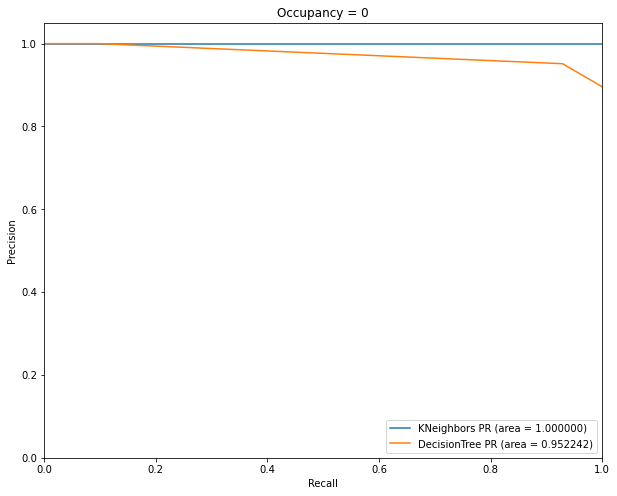

In [111]:
plt.figure(figsize=(10,8))

addPlotPr(proba_knn, 0, 'KNeighbors', inversion)
addPlotPr(proba_dtc, 0, 'DecisionTree', inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Occupancy = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

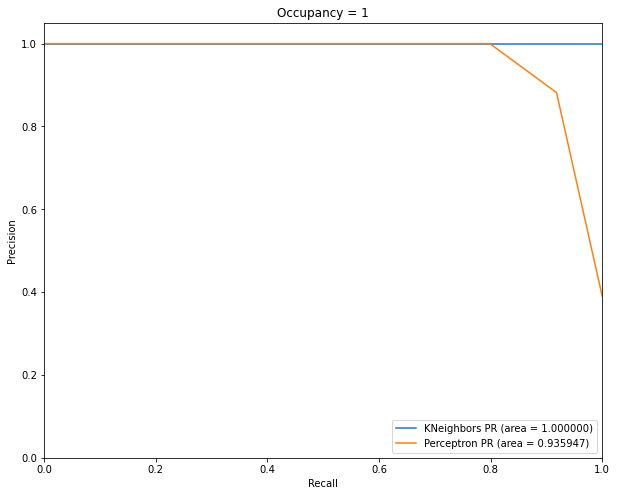

In [112]:
plt.figure(figsize=(10,8))

addPlotPr(proba_knn, 1, 'KNeighbors', y_test)
addPlotPr(proba_dtc, 1, 'Perceptron', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Occupancy = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

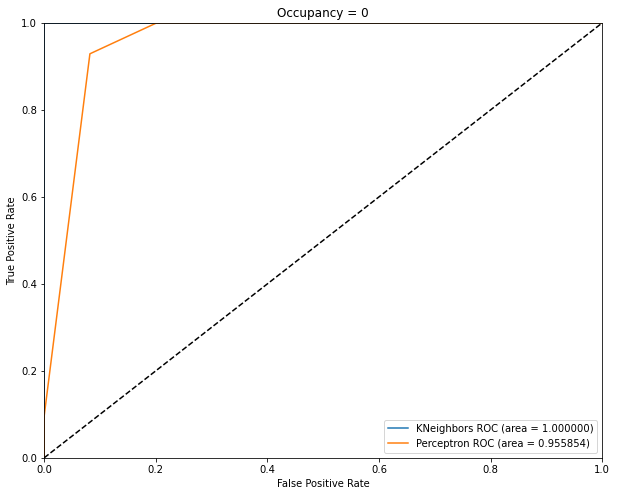

In [113]:
plt.figure(figsize=(10,8))

addPlotRoc0(proba_knn, 'KNeighbors', y_test)
addPlotRoc0(proba_dtc, 'Perceptron', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

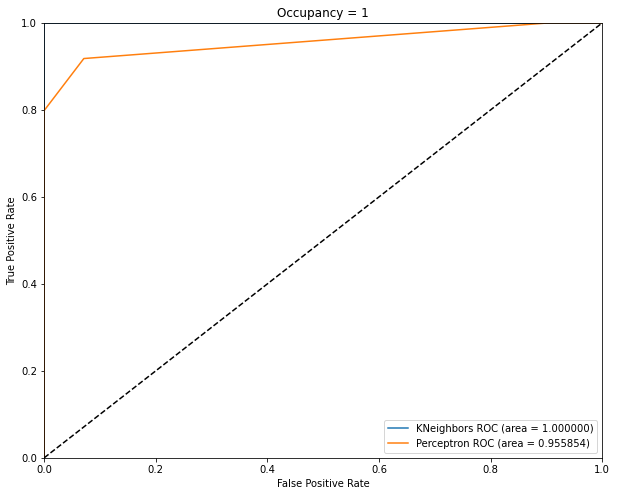

In [114]:
plt.figure(figsize=(10,8))

addPlotRoc1(proba_knn, 'KNeighbors', y_test)
addPlotRoc1(proba_dtc, 'Perceptron', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()